# 5-1 Perform KMeans

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
import pandas as pd
df_X = pd.DataFrame(X, columns=iris.feature_names)
df_y = pd.DataFrame(y, columns=["target"])
df = pd.concat([df_X,df_y], axis=1)
df_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
df_X = df_X.iloc[:, [2,3]].values

In [4]:
df_X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

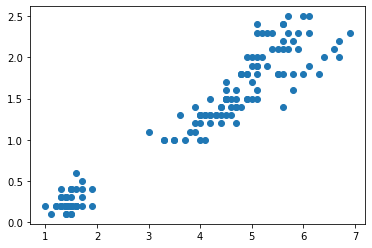

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df_X[:,0], df_X[:,1])

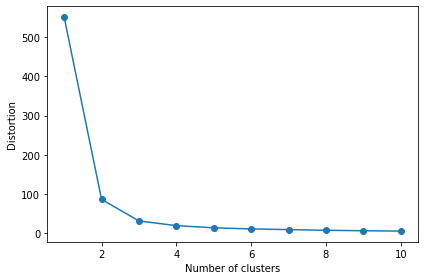

In [6]:
# plotting distortions for k = 1 to 11
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", max_iter=300, random_state=0)
    km.fit(df_X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

In [7]:

# KMeans with k = 2
km = KMeans(n_clusters=2, init="random", max_iter=300, random_state=0)

# cluster assignment
y_km = km.fit_predict(X)
y_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

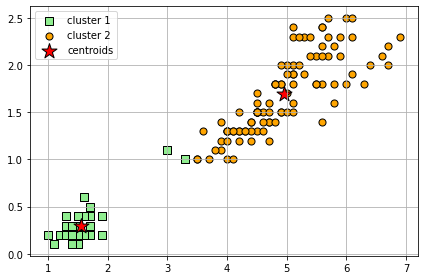

In [8]:
# plotting clusters and centers
plt.scatter(df_X[y_km == 0, 0],
            df_X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(df_X[y_km == 1, 0],
            df_X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(km.cluster_centers_[:, 2],
            km.cluster_centers_[:, 3],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()

plt.show()

# 5-2 Perform DBSCAN

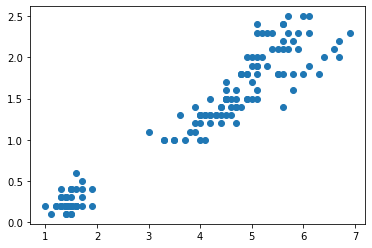

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

import pandas as pd
df_X = pd.DataFrame(X, columns=iris.feature_names)
df_y = pd.DataFrame(y, columns=["target"])
df = pd.concat([df_X,df_y], axis=1)
df_X = df_X.iloc[:, [2,3]].values
import matplotlib.pyplot as plt
plt.scatter(df_X[:,0], df_X[:,1])

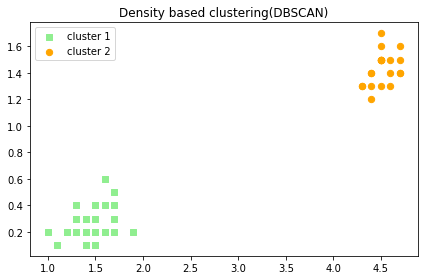

In [10]:
from sklearn.cluster import DBSCAN


wrogngdb = DBSCAN(eps=0.2, min_samples=10)
wrong_y_db = wrogngdb.fit_predict(df_X)
plt.scatter(df_X[wrong_y_db == 0, 0], df_X[wrong_y_db == 0, 1],
            c='lightgreen', marker='s', s=40,
            label='cluster 1')

plt.scatter(df_X[wrong_y_db == 1, 0], df_X[wrong_y_db == 1, 1],
            c='orange', marker='o', s=40,
            label='cluster 2')
plt.legend()
plt.title('Density based clustering(DBSCAN)')
plt.tight_layout()

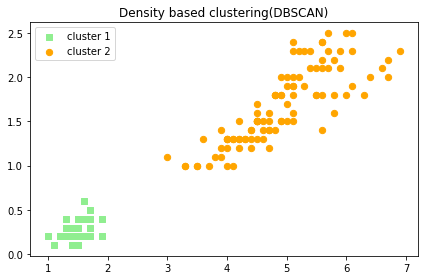

In [11]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=0.5, min_samples=5)
y_db = db.fit_predict(df_X)


plt.scatter(df_X[y_db == 0, 0], df_X[y_db == 0, 1],
            c='lightgreen', marker='s', s=40,
            label='cluster 1')

plt.scatter(df_X[y_db == 1, 0], df_X[y_db == 1, 1],
            c='orange', marker='o', s=40,
            label='cluster 2')
plt.legend()
plt.title('Density based clustering(DBSCAN)')
plt.tight_layout()


In [12]:
db.eps

0.5

In [13]:
db.min_samples

5